## pandas exploration

A leaf dataset example

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import json


import os
import time
import random
from datetime import datetime

from PIL import Image

# leaf
import pandas as pd
import shutil
from tqdm import tqdm
import math
import tensorflow.keras.backend as K

In [2]:
!ls /home/u3148947/.keras/datasets/leaf/

label_num_to_disease_map.json  sample_submission.csv  train_images
leaf_labels		       train.csv


In [3]:
DATA_PATH = '/home/u3148947/.keras/datasets/leaf/'

df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
image_id    21397 non-null object
label       21397 non-null int64
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


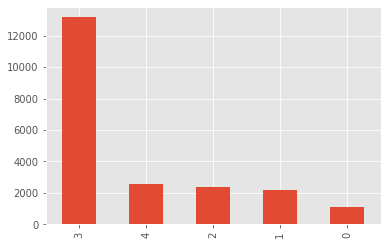

In [5]:
df.label.value_counts().plot(kind="bar")

## Labels of json

In [6]:
# check the labels

# Opening JSON file 
jsf = open(os.path.join(DATA_PATH, "label_num_to_disease_map.json")) 
  
# returns JSON object as a dictionary 
js = json.load(jsf)
    

In [7]:
print("data labes: \n", js)

data labes: 
 {'0': 'Cassava Bacterial Blight (CBB)', '1': 'Cassava Brown Streak Disease (CBSD)', '2': 'Cassava Green Mottle (CGM)', '3': 'Cassava Mosaic Disease (CMD)', '4': 'Healthy'}


In [8]:
# json to dict, dictionary.get(keyname)
for i in range(len(js)):
    print(i, js.get(str(i)))

0 Cassava Bacterial Blight (CBB)
1 Cassava Brown Streak Disease (CBSD)
2 Cassava Green Mottle (CGM)
3 Cassava Mosaic Disease (CMD)
4 Healthy


In [9]:
# JSON string to pandas object

In [10]:
# JSON string to pandas object
#typ='frame', 'series'
#orient= 'index' 'table' split

pd_js = pd.read_json(os.path.join(DATA_PATH, "label_num_to_disease_map.json"), typ='series')
pd_js

0         Cassava Bacterial Blight (CBB)
1    Cassava Brown Streak Disease (CBSD)
2             Cassava Green Mottle (CGM)
3           Cassava Mosaic Disease (CMD)
4                                Healthy
dtype: object

## List order test

In [11]:
olist=[]
for i in range(10):
    olist.append(i)

In [12]:
olist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
olist[-3:]

[7, 8, 9]

In [14]:
olist[:3]

[0, 1, 2]

### test tf.image.adjust_contrast

In [15]:
# /home/u3148947/.keras/datasets/leaf/leaf_labels/CBB/2308841380.jpg

(-0.5, 799.5, 599.5, -0.5)

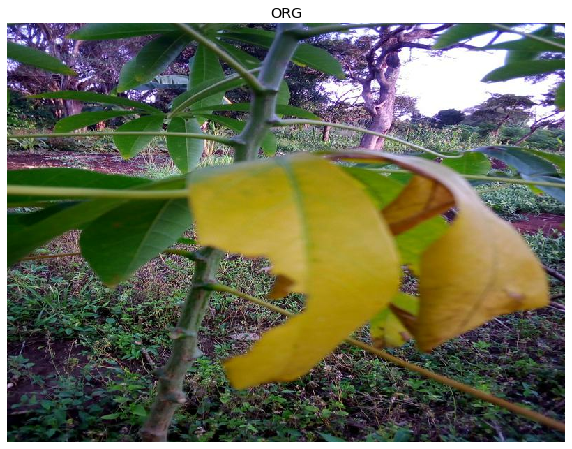

In [16]:
plt.figure(figsize=(10, 10))
# for sample_path in img_list.take(1):
# print(sample_path.numpy(), '\n')


img = tf.io.read_file('/home/u3148947/.keras/datasets/leaf/leaf_labels/CBB/2308841380.jpg')
img = tf.image.decode_jpeg(img, channels=3)
#     img = tf.io.decode_and_crop_jpeg(img, crop_window=[44, 144, 512, 512], channels=3)
plt.title('ORG')
plt.imshow(img)
plt.axis("off")

(-0.5, 799.5, 599.5, -0.5)

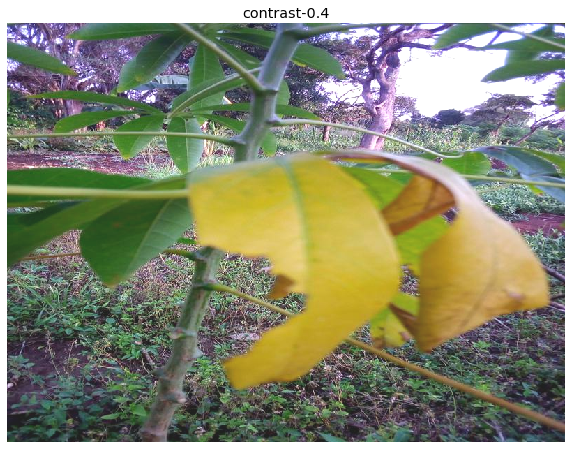

In [34]:
CC = 0.4

# img_C = tf.image.adjust_saturation(img, CC)
# img_C = tf.image.adjust_contrast(img, CC)
# img_C = tf.image.adjust_brightness(img, CC)


# img = tf.image.adjust_saturation(img, 0.7)
# img = tf.image.adjust_contrast(img, 2)
# img = tf.image.adjust_brightness(img, 0.2)


p_rotation = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
p_shear = tf.random.uniform([], 0, 1.0, dtype=tf.float32)



image =img


# # this fun has some problem!!
# # Shear
# if p_shear > .2:
#     if p_shear > .6:
#         image = transform_shear(image, img_height, shear=20.)
#     else:
#         image = transform_shear(image, img_height, shear=-20.)


# # this fun has some problem!!
# # Rotation 
# if p_rotation > .2:
#     if p_rotation > .6:
#         image = transform_rotation(image, img_height, rotation=45.)
#     else:
#         image = transform_rotation(image, img_height, rotation=-45.)

if p_pixel_1 >= .4:
    image = tf.image.random_saturation(image, lower=0.7, upper=2)

if p_pixel_2 >= .4:
    image = tf.image.random_contrast(image, lower=.07, upper=2)

if p_pixel_3 >= .4:
    image = tf.image.random_brightness(image, max_delta=.2)
        

plt.figure(figsize=(10, 10))
plt.title('contrast-' + str(CC))
plt.imshow(image)
plt.axis("off")

In [19]:
# vars
BATCH_SIZE = 64 #128 #32 
img_height = 380 #512 #224 #100
img_width = 380 #512 #224 #100
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

#IMG_SIZE = (224, 224) # IMG_SIZE = (160, 160)

In [18]:
# data augmentation @cdeotte kernel: https://www.kaggle.com/cdeotte/rotation-augmentation-gpu-tpu-0-96
def transform_rotation(image, height, rotation):
    # input image - is one image of size [dim,dim,3] not a batch of [b,dim,dim,3]
    # output - image randomly rotated
    DIM = height
    XDIM = DIM%2 #fix for size 331
    
    rotation = rotation * tf.random.uniform([1],dtype='float32')
    # CONVERT DEGREES TO RADIANS
    rotation = math.pi * rotation / 180.
    
    # ROTATION MATRIX
    c1 = tf.math.cos(rotation)
    s1 = tf.math.sin(rotation)
    one = tf.constant([1],dtype='float32')
    zero = tf.constant([0],dtype='float32')
    rotation_matrix = tf.reshape(tf.concat([c1,s1,zero, -s1,c1,zero, zero,zero,one],axis=0),[3,3])

    # LIST DESTINATION PIXEL INDICES
    x = tf.repeat( tf.range(DIM//2,-DIM//2,-1), DIM )
    y = tf.tile( tf.range(-DIM//2,DIM//2),[DIM] )
    z = tf.ones([DIM*DIM],dtype='int32')
    idx = tf.stack( [x,y,z] )
    
    # ROTATE DESTINATION PIXELS ONTO ORIGIN PIXELS
    idx2 = K.dot(rotation_matrix,tf.cast(idx,dtype='float32'))
    idx2 = K.cast(idx2,dtype='int32')
    idx2 = K.clip(idx2,-DIM//2+XDIM+1,DIM//2)
    
    # FIND ORIGIN PIXEL VALUES 
    idx3 = tf.stack( [DIM//2-idx2[0,], DIM//2-1+idx2[1,]] )
    d = tf.gather_nd(image, tf.transpose(idx3))
        
    return tf.reshape(d,[DIM,DIM,3])

def transform_shear(image, height, shear):
    # input image - is one image of size [dim,dim,3] not a batch of [b,dim,dim,3]
    # output - image randomly sheared
    DIM = height
    XDIM = DIM%2 #fix for size 331
    
    shear = shear * tf.random.uniform([1],dtype='float32')
    shear = math.pi * shear / 180.
        
    # SHEAR MATRIX
    one = tf.constant([1],dtype='float32')
    zero = tf.constant([0],dtype='float32')
    c2 = tf.math.cos(shear)
    s2 = tf.math.sin(shear)
    shear_matrix = tf.reshape(tf.concat([one,s2,zero, zero,c2,zero, zero,zero,one],axis=0),[3,3])    

    # LIST DESTINATION PIXEL INDICES
    x = tf.repeat( tf.range(DIM//2,-DIM//2,-1), DIM )
    y = tf.tile( tf.range(-DIM//2,DIM//2),[DIM] )
    z = tf.ones([DIM*DIM],dtype='int32')
    idx = tf.stack( [x,y,z] )
    
    # ROTATE DESTINATION PIXELS ONTO ORIGIN PIXELS
    idx2 = K.dot(shear_matrix,tf.cast(idx,dtype='float32'))
    idx2 = K.cast(idx2,dtype='int32')
    idx2 = K.clip(idx2,-DIM//2+XDIM+1,DIM//2)
    
    # FIND ORIGIN PIXEL VALUES 
    idx3 = tf.stack( [DIM//2-idx2[0,], DIM//2-1+idx2[1,]] )
    d = tf.gather_nd(image, tf.transpose(idx3))
        
    return tf.reshape(d,[DIM,DIM,3])